In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'C:\Users\theha\OneDrive\Desktop\Projects\3. Customer Churn\Dataset\telecom_churn_dirty.csv')
print(df.head())

   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1      NaN       123            NaN        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  


In [3]:
print("Dataset Shape", df.shape)

Dataset Shape (3343, 11)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3343 non-null   int64  
 1   AccountWeeks     3343 non-null   int64  
 2   ContractRenewal  3343 non-null   int64  
 3   DataPlan         3343 non-null   int64  
 4   DataUsage        3166 non-null   float64
 5   CustServCalls    3343 non-null   int64  
 6   DayMins          3174 non-null   float64
 7   DayCalls         3343 non-null   int64  
 8   MonthlyCharge    3175 non-null   float64
 9   OverageFee       3343 non-null   float64
 10  RoamMins         3343 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 287.4 KB


In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = [col for col in num_cols if df[col].nunique() > 2]

df[num_cols].describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3343.000000,3166.000000,3343.000000,3174.000000,3343.000000,3175.000000,3343.000000,3343.000000
mean,101.084954,0.821396,1.633862,181.217297,100.369130,56.231339,10.051726,10.240114
std,39.783277,1.273260,2.287913,63.318038,20.144262,16.435986,2.535411,2.790750
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,1.000000,144.000000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.810000,2.000000,216.600000,114.000000,66.000000,11.770000,12.100000
max,243.000000,5.400000,50.000000,1000.000000,165.000000,111.300000,18.190000,20.000000


In [6]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))


Column: Churn
Churn
0    2859
1     484
Name: count, dtype: int64
Churn
0    0.85522
1    0.14478
Name: proportion, dtype: float64

Column: ContractRenewal
ContractRenewal
1    3020
0     323
Name: count, dtype: int64
ContractRenewal
1    0.90338
0    0.09662
Name: proportion, dtype: float64

Column: DataPlan
DataPlan
0    2419
1     924
Name: count, dtype: int64
DataPlan
0    0.723602
1    0.276398
Name: proportion, dtype: float64


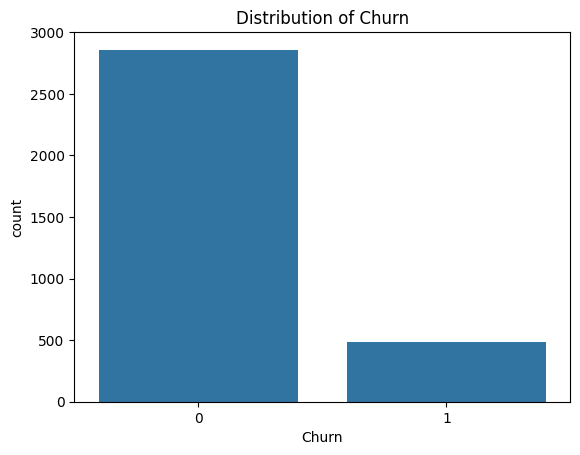

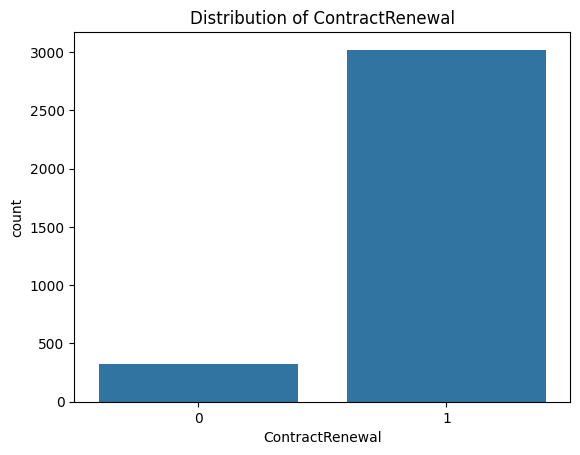

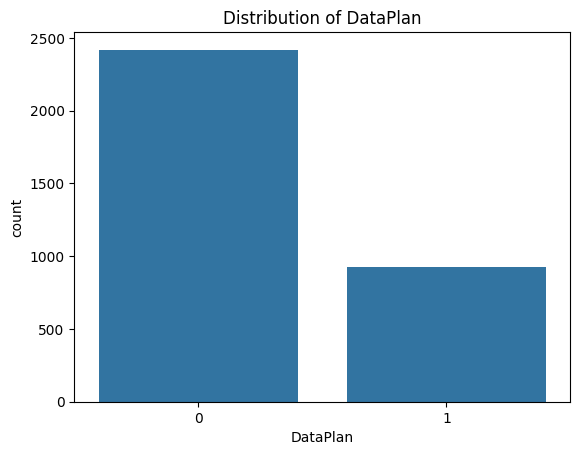

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in binary_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

In [8]:
df.isnull().sum()

Churn                0
AccountWeeks         0
ContractRenewal      0
DataPlan             0
DataUsage          177
CustServCalls        0
DayMins            169
DayCalls             0
MonthlyCharge      168
OverageFee           0
RoamMins             0
dtype: int64

In [9]:
outliers_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outliers_summary[col] = {
        "Q1": Q1, "Q3": Q3, "IQR": IQR,
        "Lower": lower, "Upper": upper,
        "Num_Outliers": outliers.shape[0],
        "Pct_Outliers": round(outliers.shape[0] / df.shape[0] * 100, 2)
    }

pd.DataFrame(outliers_summary).T

,Q1,Q3,IQR,Lower,Upper,Num_Outliers,Pct_Outliers
AccountWeeks,74.00,127.00,53.00,-5.500,206.500,18.0,0.54
DataUsage,0.00,1.81,1.81,-2.715,4.525,8.0,0.24
CustServCalls,1.00,2.00,1.00,-0.500,3.500,273.0,8.17
DayMins,144.00,216.60,72.60,35.100,325.500,30.0,0.90
DayCalls,87.00,114.00,27.00,46.500,154.500,24.0,0.72
MonthlyCharge,45.00,66.00,21.00,13.500,97.500,35.0,1.05
OverageFee,8.33,11.77,3.44,3.170,16.930,24.0,0.72
RoamMins,8.50,12.10,3.60,3.100,17.500,46.0,1.38


In [ ]:
cols_to_check = ['CustServCalls', 'DayMins', 'MonthlyCharge', 'RoamMins']

for col in cols_to_check:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()